## <font color='blue'>PART I:</font>

##  <font color='blue'>Domain: Mobile device apps</font>

### 1. Import required libraries and read the dataset

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from statsmodels.formula.api import ols

In [2]:
df1 = pd.read_csv("Apps_data+(1).csv")
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
df1.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8404,Call of Mini™ Dino Hunter,GAME,4.2,326042,10M,"10,000,000+",Free,0,Teen,Action,"June 6, 2014",3.1.7,3.0 and up
9564,Real Madrid App,SPORTS,4.6,161423,73M,"5,000,000+",Free,0,Everyone,Sports,"August 1, 2018",6.5.3,5.0 and up
3114,Google Trips - Travel Planner,TRAVEL_AND_LOCAL,4.1,26871,Varies with device,"5,000,000+",Free,0,Everyone,Travel & Local,"July 26, 2018",1.10.0.205086730,4.1 and up


In [4]:
df1.shape

(10841, 13)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


__The dataset contains 10,841 entries with 13 columns, including one float column (Rating) and 12 object columns; it exhibits missing values in columns such as Rating, Type, Content Rating, Current Ver, and Android Ver, and further preprocessing is needed to handle data types, address missing values, and convert certain columns to numerical formats for analysis__

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [6]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df1.describe(include="object").T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


__Rating:__ There are missing values to Handle and outliers if any.

__Reviews:__ Convert to a numeric data type.

__Size:__ Standardize and convert to a uniform numeric format.

__Installs:__ Clean and convert to a numeric data type.

__Type:__ Address the missing value.

__Price:__ Remove any currency symbols and convert to a numeric data type.

__Content Rating, Genres, Category:__ Depending on the model, these categorical values might need encoding (lable encoding or one-hot encoding).

__Last Updated, Current Ver, Android Ver:__ Convert these to a more usable format if they are going to be used as features in the model.

In [3]:
df = df1.copy()

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [9]:
df.duplicated().sum()

483

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
df[df['Category'].str.contains('1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df.drop(index=9990,inplace=True)

In [12]:
df[df['Category'].str.contains('1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [13]:
df['Rating'].isnull().sum()

1465

In [14]:
df.dropna(subset=['Rating'], inplace=True)

In [15]:
df['Rating_category'] = df['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8892 non-null   object 
 1   Category         8892 non-null   object 
 2   Rating           8892 non-null   float64
 3   Reviews          8892 non-null   object 
 4   Size             8892 non-null   object 
 5   Installs         8892 non-null   object 
 6   Type             8892 non-null   object 
 7   Price            8892 non-null   object 
 8   Content Rating   8892 non-null   object 
 9   Genres           8892 non-null   object 
 10  Last Updated     8892 non-null   object 
 11  Current Ver      8888 non-null   object 
 12  Android Ver      8890 non-null   object 
 13  Rating_category  8892 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [16]:
df['Rating'].isnull().sum()

0

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [17]:
df['Rating_category'].value_counts()

Rating_category
High    8012
Low      880
Name: count, dtype: int64

__The dataset displays an imbalance in the 'Rating_category,' with a substantial number categorized as 'High' and a notably smaller count for 'Low,' which can impact model training, particularly in machine learning, leading to potential biases towards the majority class in classification tasks.__

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [18]:
df['Reviews'] = df['Reviews'].astype(float)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [19]:
df['Reviews'].unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

In [20]:
df['Reviews'].isnull().sum()

0

<Axes: xlabel='Reviews'>

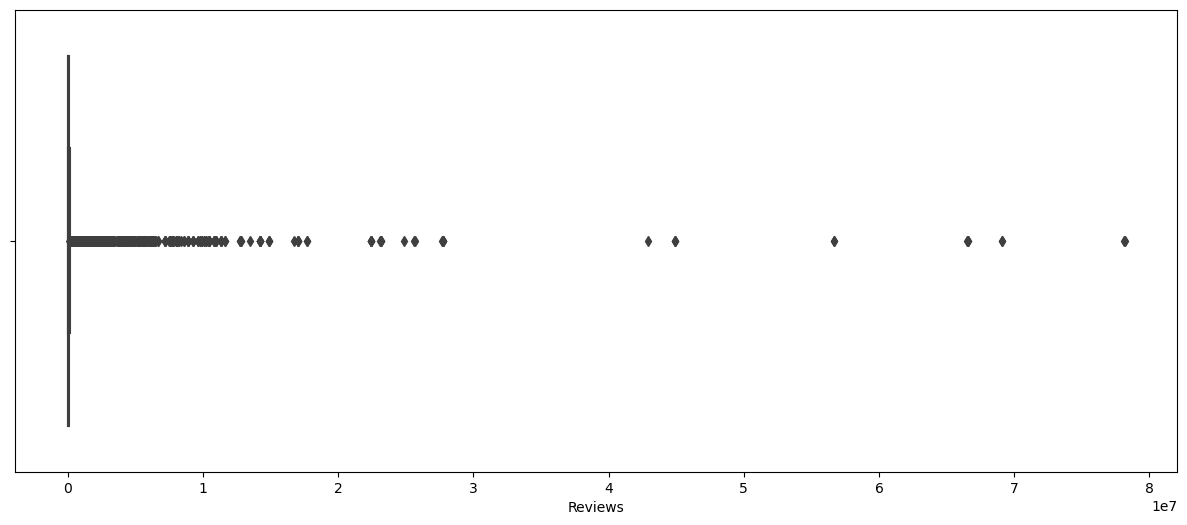

In [21]:
plt.figure(figsize = (15, 6))
sns.boxplot(x=df['Reviews'])

In [22]:
def outliers(col):
    
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    
    return lw, uw

In [23]:
outliers(df['Reviews'])

(-106490.125, 177920.875)

In [24]:
for i in ['Reviews']:
    lw, uw = outliers(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

<Axes: xlabel='Reviews'>

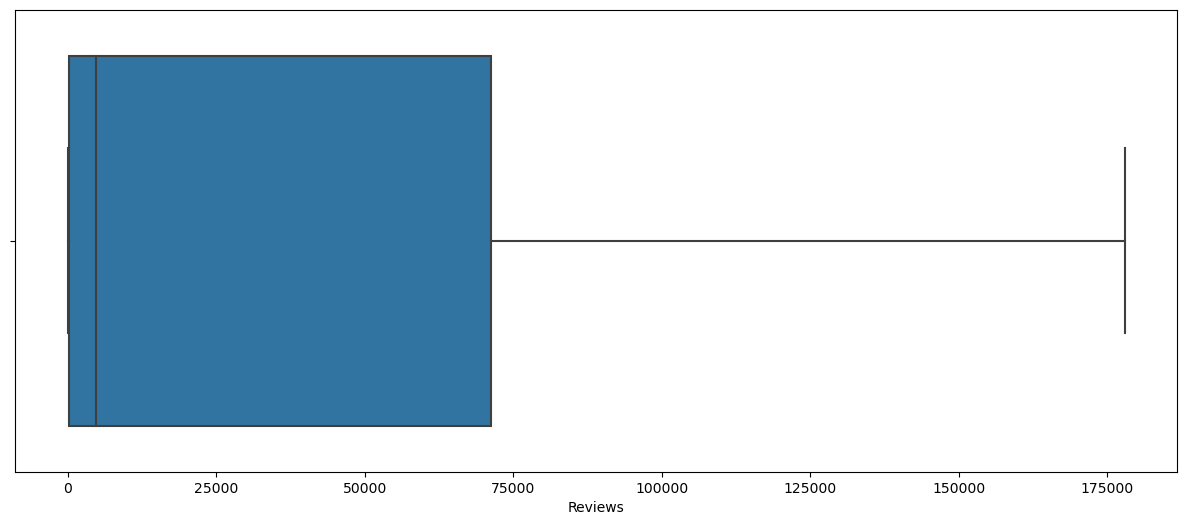

In [25]:
plt.figure(figsize = (15, 6))
sns.boxplot(x=df['Reviews'])

<Axes: >

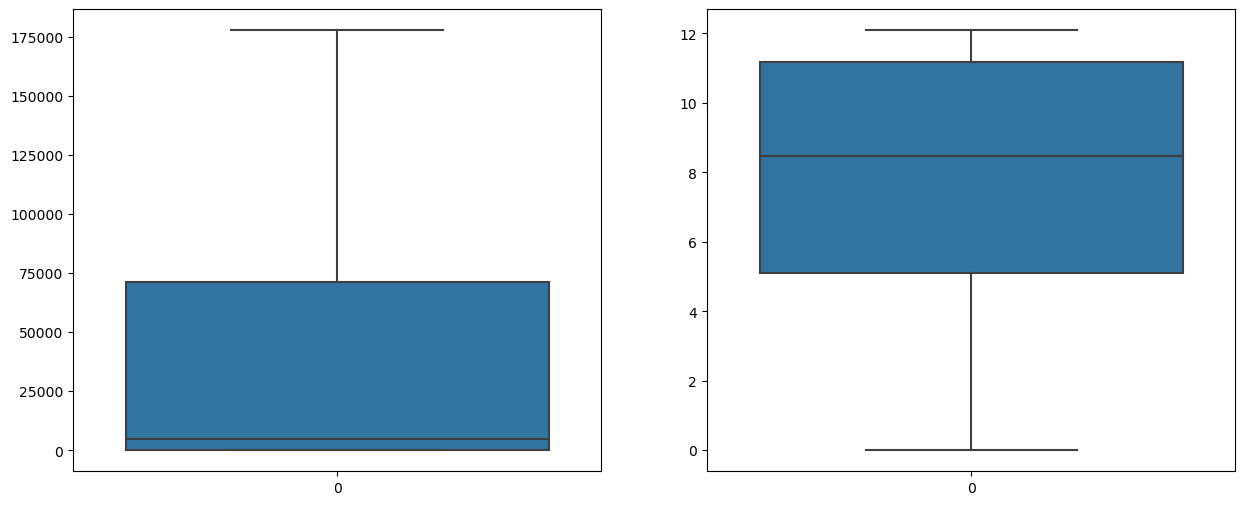

In [26]:
plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
sns.boxplot(df['Reviews'])

plt.subplot(1,2,2)
sns.boxplot(np.log(df['Reviews']))

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [27]:
df['Size'] = df['Size'].replace(['M', 'k'], ['e6', 'e3'], regex=True)

In [28]:
df['Size'].unique()

array(['19e6', '14e6', '8.7e6', '25e6', '2.8e6', '5.6e6', '29e6', '33e6',
       '3.1e6', '28e6', '12e6', '20e6', '21e6', '37e6', '2.7e6', '5.5e6',
       '17e6', '39e6', '31e6', '4.2e6', '23e6', '6.0e6', '6.1e6', '4.6e6',
       '9.2e6', '5.2e6', '11e6', '24e6', 'Varies with device', '9.4e6',
       '15e6', '10e6', '1.2e6', '26e6', '8.0e6', '7.9e6', '56e6', '57e6',
       '35e6', '54e6', '201e3', '3.6e6', '5.7e6', '8.6e6', '2.4e6',
       '27e6', '2.5e6', '7.0e6', '16e6', '3.4e6', '8.9e6', '3.9e6',
       '2.9e6', '38e6', '32e6', '5.4e6', '18e6', '1.1e6', '2.2e6',
       '4.5e6', '9.8e6', '52e6', '9.0e6', '6.7e6', '30e6', '2.6e6',
       '7.1e6', '22e6', '6.4e6', '3.2e6', '8.2e6', '4.9e6', '9.5e6',
       '5.0e6', '5.9e6', '13e6', '73e6', '6.8e6', '3.5e6', '4.0e6',
       '2.3e6', '2.1e6', '42e6', '9.1e6', '55e6', '23e3', '7.3e6',
       '6.5e6', '1.5e6', '7.5e6', '51e6', '41e6', '48e6', '8.5e6', '46e6',
       '8.3e6', '4.3e6', '4.7e6', '3.3e6', '40e6', '7.8e6', '8.8e6',
       '6.6e

In [29]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)

In [30]:
df.dropna(subset=['Size'], inplace=True)

In [31]:
df['Size'].str.contains('nan').sum()

0

In [32]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   object 
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(3), object(11)
memory usage: 870.0+ KB


In [34]:
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        4
Android Ver        2
Rating_category    0
dtype: int64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [35]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [36]:
df['Installs'] = df['Installs'].str.replace('[^\d]', '', regex=True).astype(float)

In [37]:
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01, 1.e+09,
       5.e+00, 5.e+01, 1.e+00])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10357
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7424 non-null   object 
 1   Category         7424 non-null   object 
 2   Rating           7424 non-null   float64
 3   Reviews          7424 non-null   float64
 4   Size             7424 non-null   float64
 5   Installs         7424 non-null   float64
 6   Type             7424 non-null   object 
 7   Price            7424 non-null   object 
 8   Content Rating   7424 non-null   object 
 9   Genres           7424 non-null   object 
 10  Last Updated     7424 non-null   object 
 11  Current Ver      7420 non-null   object 
 12  Android Ver      7422 non-null   object 
 13  Rating_category  7424 non-null   object 
dtypes: float64(4), object(10)
memory usage: 870.0+ KB


In [39]:
df['Installs'].isna().sum()

0

###  11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [40]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [41]:
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True).astype(float)

In [42]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [43]:
df['Price'].info()

<class 'pandas.core.series.Series'>
Index: 7424 entries, 0 to 10357
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
7424 non-null   float64
dtypes: float64(1)
memory usage: 116.0 KB


In [44]:
df['Price'].isna().sum()

0

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [119]:
App = df.copy()

In [91]:
for i in ['Type','Content Rating','Rating_category']:
    print(App[i].value_counts())
    print('*'*50)

Type
Free    6877
Paid     547
Name: count, dtype: int64
**************************************************
Content Rating
Everyone           5958
Teen                832
Mature 17+          332
Everyone 10+        299
Adults only 18+       2
Unrated               1
Name: count, dtype: int64
**************************************************
Rating_category
High    6599
Low      825
Name: count, dtype: int64
**************************************************


In [120]:
App.drop(columns=['App','Category', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True)

In [110]:
App.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10357
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviews          7424 non-null   float64
 1   Size             7424 non-null   float64
 2   Installs         7424 non-null   float64
 3   Type             7424 non-null   object 
 4   Price            7424 non-null   float64
 5   Content Rating   7424 non-null   object 
 6   Rating_category  7424 non-null   object 
dtypes: float64(4), object(3)
memory usage: 464.0+ KB


In [111]:
App['Content Rating'].nunique()

6

In [127]:
App.head(3)

,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,159.0,19000000.0,10000.0,Free,0.0,Everyone,High
1,967.0,14000000.0,500000.0,Free,0.0,Everyone,High
2,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,High


### 13. Encode the categorical columns.

In [141]:
dummies = pd.get_dummies(App, columns=['Type'])
dummies['Rating_category'] = dummies['Rating_category'].replace(['Low','High'], ['0', '1'], regex=True).astype('int64')
dummies = pd.get_dummies(dummies,columns=['Content Rating'], drop_first=True)

In [142]:
# Unrated:1 if we use this column mean it well get nan in the summary so that why we removeing
dummies.drop(columns=['Content Rating_Unrated'], inplace=True)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10357
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Reviews                      7424 non-null   float64
 1   Size                         7424 non-null   float64
 2   Installs                     7424 non-null   float64
 3   Price                        7424 non-null   float64
 4   Rating_category              7424 non-null   int64  
 5   Type_Free                    7424 non-null   bool   
 6   Type_Paid                    7424 non-null   bool   
 7   Content Rating_Everyone      7424 non-null   bool   
 8   Content Rating_Everyone 10+  7424 non-null   bool   
 9   Content Rating_Mature 17+    7424 non-null   bool   
 10  Content Rating_Teen          7424 non-null   bool   
dtypes: bool(6), float64(4), int64(1)
memory usage: 391.5 KB


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [143]:
X = dummies.drop('Rating_category', axis=1)
y = dummies['Rating_category']

In [144]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Reviews                      7424 non-null   float64
 1   Size                         7424 non-null   float64
 2   Installs                     7424 non-null   float64
 3   Price                        7424 non-null   float64
 4   Type_Free                    7424 non-null   bool   
 5   Type_Paid                    7424 non-null   bool   
 6   Content Rating_Everyone      7424 non-null   bool   
 7   Content Rating_Everyone 10+  7424 non-null   bool   
 8   Content Rating_Mature 17+    7424 non-null   bool   
 9   Content Rating_Teen          7424 non-null   bool   
dtypes: bool(6), float64(4)
memory usage: 333.5 KB


### 15. Split the dataset into train and test.

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 16. Standardize the data, so that the values are within a particular range

In [146]:
X.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Type_Free', 'Type_Paid',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen'],
      dtype='object')

In [147]:
x_train.head(3)

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
6333,158.000,26000000.0,50000.0,0.0,True,False,False,False,True,False
391,177920.875,11000000.0,10000000.0,0.0,True,False,True,False,False,False
2888,12388.000,5300000.0,1000000.0,0.0,True,False,True,False,False,False


In [148]:
 x_test.head(3)

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
1650,177920.875,81000000.0,5000000.0,0.0,True,False,False,False,False,True
3960,80.000,7600000.0,10000.0,0.0,True,False,True,False,False,False
116,74.000,2900000.0,10000.0,0.0,True,False,True,False,False,False


In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
## Scaling the data
ss = StandardScaler()
x_train.iloc[:,:4] = ss.fit_transform(x_train.iloc[:,:4])
x_test.iloc[:,:4] = ss.transform(x_test.iloc[:,:4])

In [151]:
x_train.head(3)

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
6333,-0.589114,0.139069,-0.167366,-0.06402,True,False,False,False,True,False
391,2.276781,-0.500747,0.045809,-0.06402,True,False,True,False,False,False
2888,-0.391942,-0.743878,-0.147012,-0.06402,True,False,True,False,False,False


In [152]:
 x_test.head(3)

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
1650,2.276781,2.485063,-0.061314,-0.06402,True,False,False,False,False,True
3960,-0.590372,-0.645772,-0.168223,-0.06402,True,False,True,False,False,False
116,-0.590469,-0.846248,-0.168223,-0.06402,True,False,True,False,False,False


## ___________________________________________________________________________

## <font color='blue'>PART II:</font>

## <font color='blue'>Domain: Food and agriculture</font>

### 1. Import required libraries and read the dataset

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('honeyproduction.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.shape

(626, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


__The dataset comprises 626 entries and 8 columns, including 5 columns with float64 data type, 2 columns with int64 data type, and 1 column with object data type. Importantly, there are no missing values present in this dataset.__

In [6]:
for i in ['state','year']:
    print(df[i].value_counts())
    print('*'*50)

state
AL    15
SD    15
NJ    15
NM    15
NY    15
NC    15
ND    15
OH    15
OR    15
PA    15
TN    15
MT    15
TX    15
UT    15
VT    15
VA    15
WA    15
WV    15
WI    15
WY    15
AZ    15
NE    15
MO    15
IN    15
AR    15
CA    15
CO    15
FL    15
GA    15
HI    15
ID    15
IL    15
IA    15
KS    15
KY    15
LA    15
ME    15
MI    15
MN    15
MS    15
NV    11
OK     6
MD     6
SC     3
Name: count, dtype: int64
**************************************************
year
2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: count, dtype: int64
**************************************************


In [7]:
for i in ['state','year','numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']:
    print(df[i].unique())
    print('*'*50)

['AL' 'AZ' 'AR' 'CA' 'CO' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS' 'KY'
 'LA' 'ME' 'MD' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NJ' 'NM' 'NY' 'NC'
 'ND' 'OH' 'OK' 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI'
 'WY' 'SC']
**************************************************
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012]
**************************************************
[ 16000.  55000.  53000. 450000.  27000. 230000.  75000.   8000. 120000.
   9000.  50000.   3000.  41000.  10000.   7000.  80000. 140000.  18000.
  23000. 115000.  64000.  11000.  14000.  65000.   4000.  26000. 225000.
  91000.  30000.   6000.  58000.  89000.  46000.  17000.  52000. 465000.
 228000.  40000.  13000.  48000.  73000. 145000.  24000. 122000.  15000.
  69000. 255000.  20000.  45000.  28000. 224000. 108000.  37000. 440000.
  29000. 232000. 100000.  43000.  72000. 150000. 124000. 300000.  25000.
 235000. 105000.  84000.  39000. 460000. 220000.  33000.  76000. 135000.
  22000. 13

### 3. Display the percentage distribution of the data in each year using the pie chart.

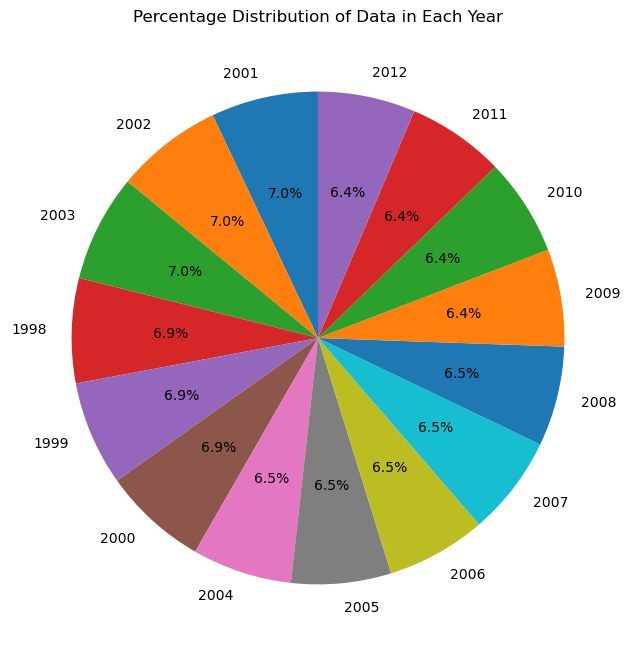

In [8]:
yearly_distribution = df['year'].value_counts(normalize=True)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(yearly_distribution, labels=yearly_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Data in Each Year')
plt.show()

__In the dataset, the percentage distribution of data reveals that the year 2001 constitutes approximately 7.03%, while other years, such as 2002 and 2003, also contribute around 7.03%, and the years 1998, 1999, and 2000 each represent approximately 6.87%. Subsequent years, including 2004 to 2012, exhibit a similar pattern, accounting for around 6.55% to 6.39% of the total dataset.__

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

<Figure size 1500x600 with 0 Axes>

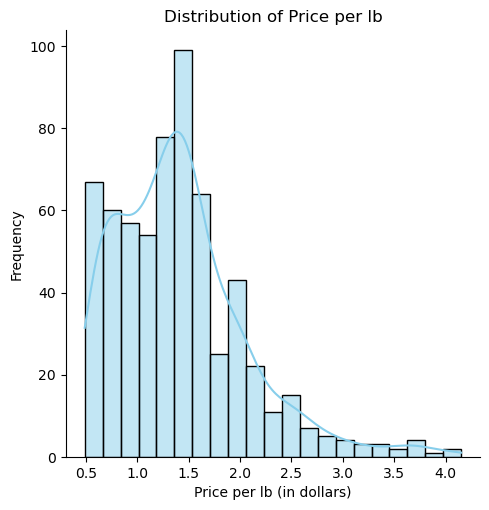

In [9]:
plt.figure(figsize=(15, 6))
sns.displot(df['priceperlb'], kde=True, color='skyblue')
plt.title('Distribution of Price per lb')
plt.xlabel('Price per lb (in dollars)')
plt.ylabel('Frequency')
plt.show()

__The "price per lb" variable exhibits a right-skewed distribution, indicating that a majority of the observations have lower prices per pound. The majority of prices per pound seem to be concentrated in the lower range, with a peak around a certain price point. The distribution is positively skewed, suggesting that there are fewer instances of higher prices per pound, but some observations extend to higher values. The x-axis, representing "Price per lb (in dollars)," ranges from 0.5 to 4.0, with more concentration towards the lower end of the scale. The y-axis indicates the frequency of occurrences, and the histogram is designed to reflect a <font color='blue'>right-skewed pattern, with values decreasing as prices per pound increase</font>.__

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

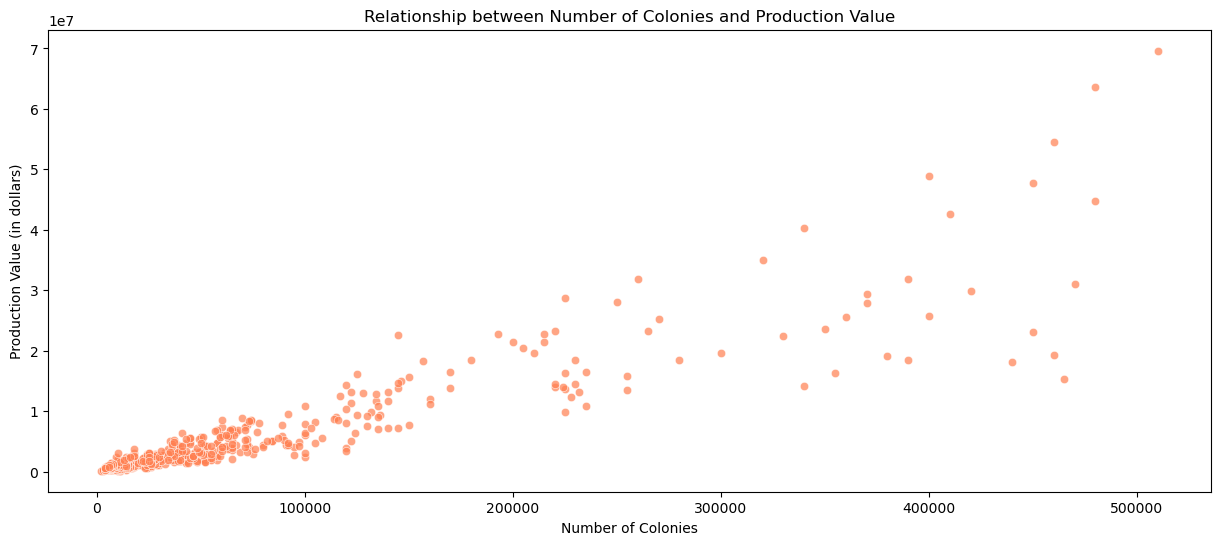

In [10]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='numcol', y='prodvalue', data=df, color='coral', alpha=0.7)
plt.title('Relationship between Number of Colonies and Production Value')
plt.xlabel('Number of Colonies')
plt.ylabel('Production Value (in dollars)')
plt.show()

In [11]:
df['numcol'].corr(df['prodvalue'])

0.9127962488930386

__The scatterplot illustrates a strong positive correlation between the number of honey-producing colonies ('numcol') and the production value ('prodvalue'). The correlation coefficient of approximately 0.913 suggests a high degree of linear dependence, indicating that as the number of colonies increases, there is a corresponding increase in production value. Each point on the scatterplot represents an entry in the dataset, and the overall trend suggests that beekeepers with a greater number of colonies tend to generate higher production values.__

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.¶

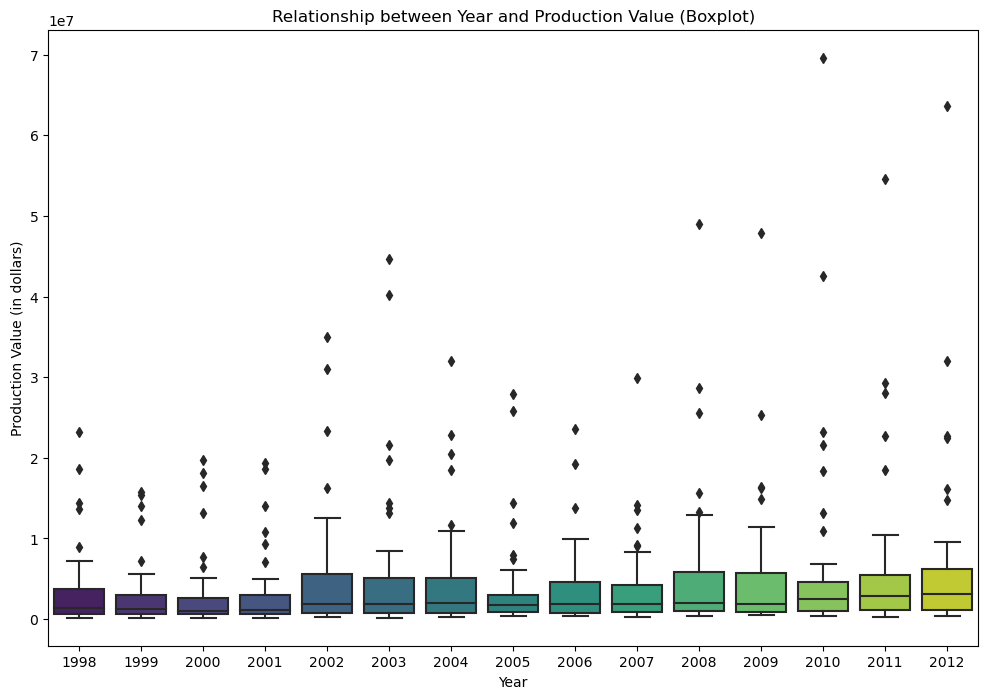

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='prodvalue', data=df, palette='viridis')
plt.title('Relationship between Year and Production Value (Boxplot)')
plt.xlabel('Year')
plt.ylabel('Production Value (in dollars)')
plt.show()

__The boxplot reveals the distribution of production values ('prodvalue') for each year in the dataset.__

__In the years 1998 to 2012, there are outliers present in the upper whisker of the boxplot.__

__But in the years 2010, 2011, and 2012, there are outliers present in the upper whisker of the boxplot, indicating instances of significantly higher production values during these years.__

__Among these three years, 2012 appears to have the highest production values, as its upper whisker extends the furthest.__

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

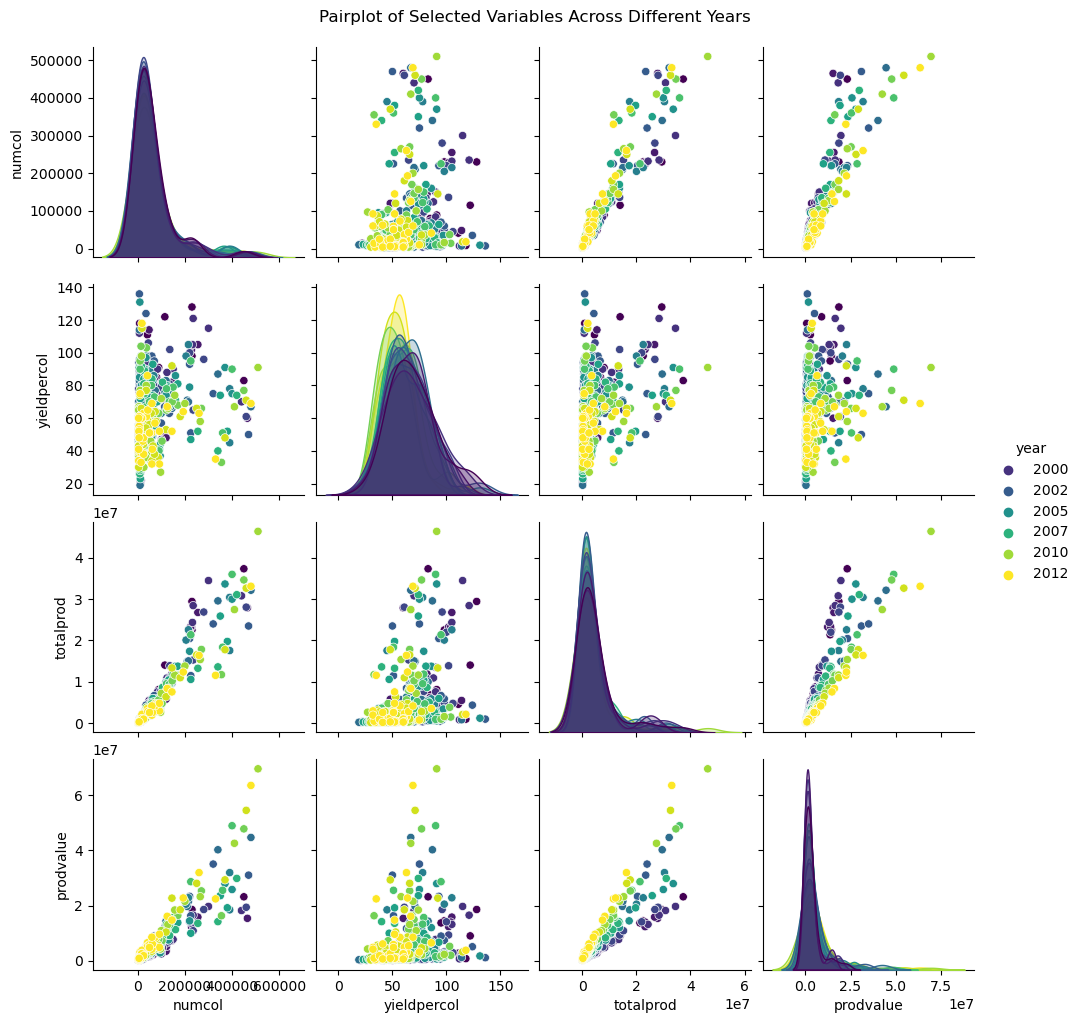

In [13]:
# Plotting the pairplot
sns.pairplot(data = df, vars = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue'], hue='year', palette='viridis')
plt.suptitle('Pairplot of Selected Variables Across Different Years', y=1.02)
plt.show()

### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

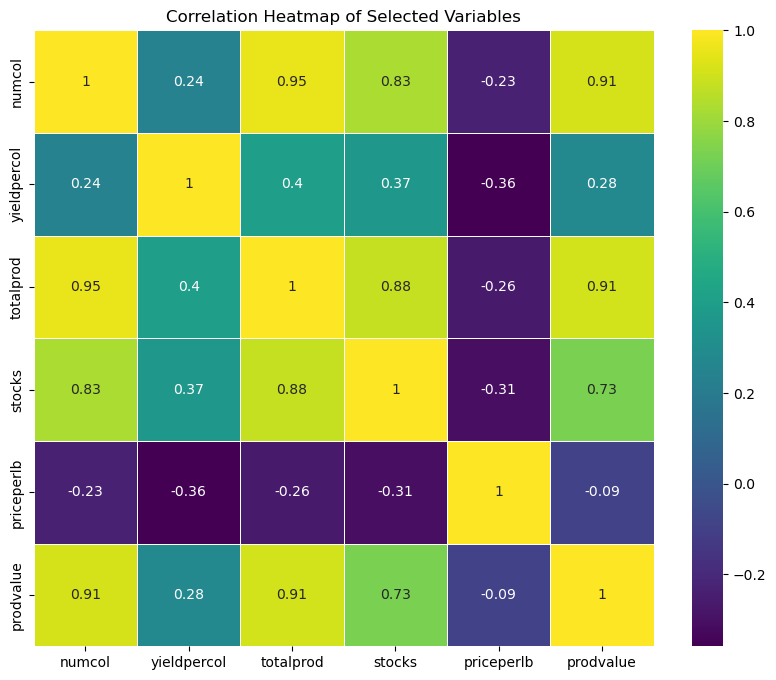

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data = df[['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']].corr(),linewidths=.5, annot = True, cmap = 'viridis')
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

__The correlation analysis reveals strong positive relationships, with the highest correlations observed between 'numcol' and 'totalprod' (0.95), as well as 'totalprod' and 'prodvalue' (0.91).__

__Moderately positive relationships include 'totalprod' and 'stocks' (0.88), 'numcol' and 'stocks' (0.83)__


__This are the  negative relationships are found between 'stocks' and 'priceperlb' (-0.31), 'yieldpercol' and 'priceperlb' (-0.36), and 'totalprod' and 'priceperlb' (-0.26),'priceperlb' and 'prodvalue' (-0.09).__

__The weakest correlations are observed between , 'yieldpercol' and 'prodvalue' (0.28), and 'yieldpercol' and 'totalprod' (0.40).__